# **To explore Business Analytics**


We are supposed to perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’. 

Problem : 
You are the business owner of the retail firm and want to see
how your company is performing. You are interested in finding
out the weak areas where you can work to make more profit.
What all business problems you can derive by looking into the
data? 

### **Importing all libraries**

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### **Load the dataset**

In [45]:
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [46]:
df.shape

(9994, 13)

In [47]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [49]:
# Checking null values
df.isnull().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [50]:
df.duplicated().sum()

17

In [51]:
df.drop_duplicates(keep='first', inplace=True)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [52]:
corr = df.corr()
corr

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


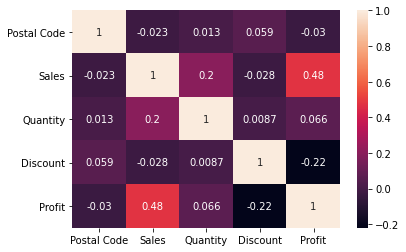

In [53]:
sns.heatmap(corr,annot=True)
plt.show()

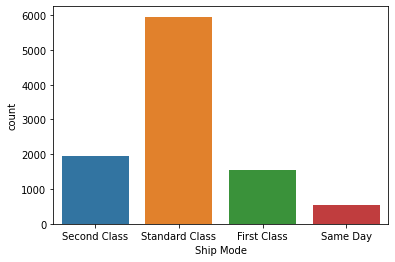

In [54]:
sns.countplot(df['Ship Mode'])
plt.show()

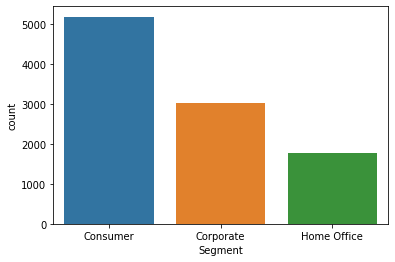

In [55]:
sns.countplot(df['Segment'])
plt.show()

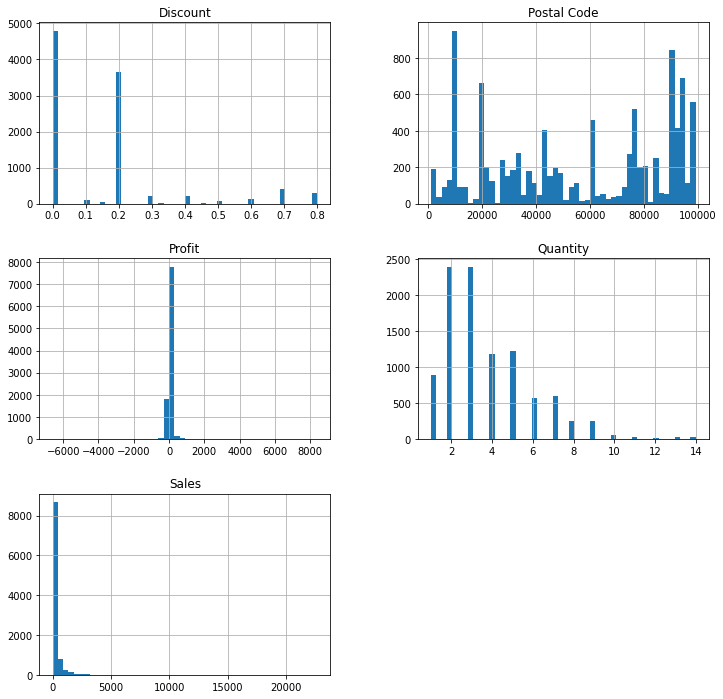

In [56]:
df.hist(figsize=(12,12),bins=50)
plt.show()

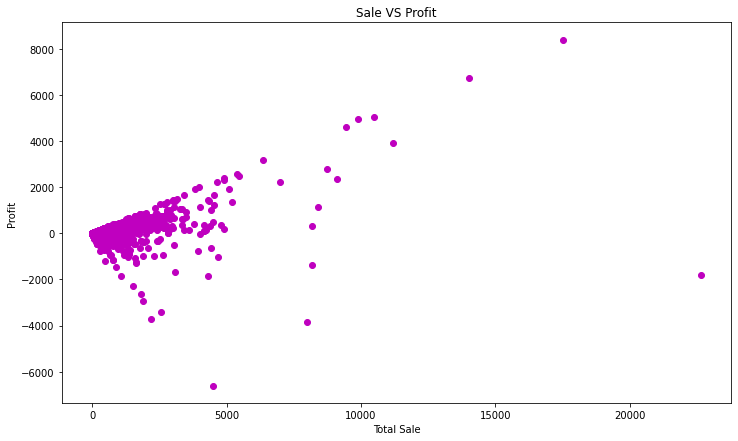

In [57]:
plt.figure(figsize=(12,7))
plt.scatter(x=df['Sales'],y=df['Profit'],c='m')
plt.title("Sale VS Profit")
plt.xlabel('Total Sale')
plt.ylabel("Profit")
plt.show()

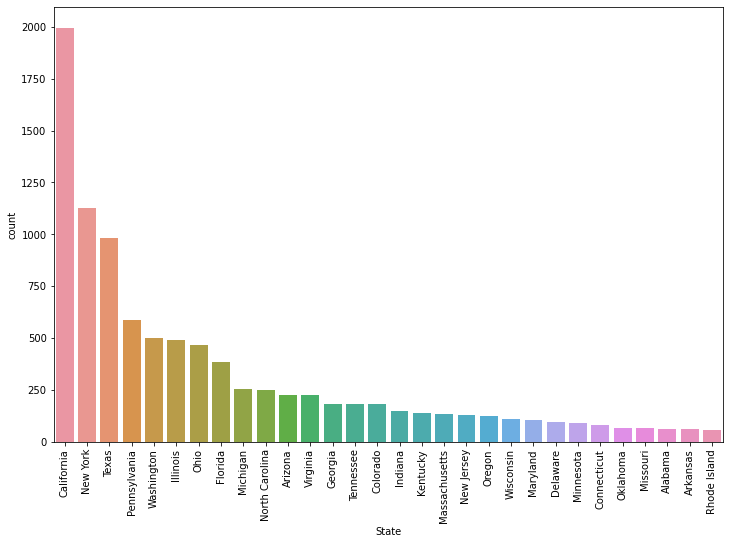

In [58]:
plt.figure(figsize=(12,8))
sns.countplot(df['State'],order=(df['State'].value_counts().head(30)).index)
plt.xticks(rotation=90)
plt.show()

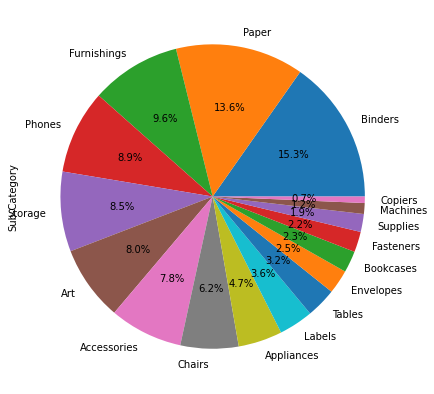

In [59]:
plt.figure(figsize=(12,7))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

<Figure size 936x648 with 0 Axes>

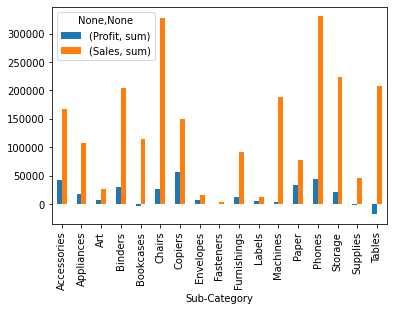

In [60]:
# total profit and sales
plt.figure(figsize=(13,9))
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

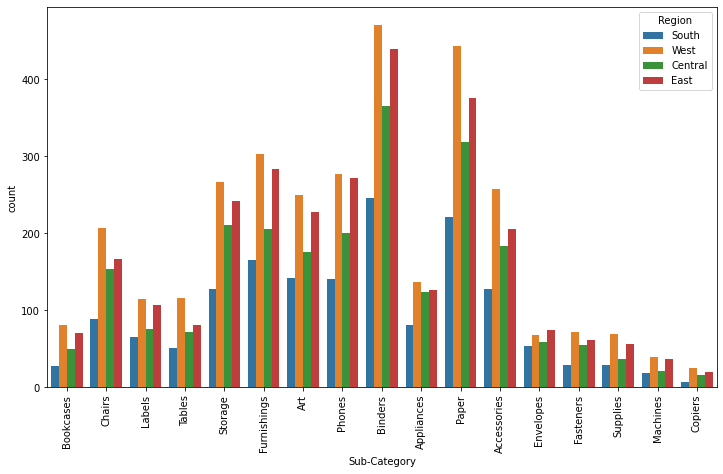

In [61]:
# Counts of Sub-Category Region-Wise
plt.figure(figsize=(12,7))
sns.countplot(x='Sub-Category',hue='Region',data=df)
plt.xticks(rotation=90)
plt.show()